In [7]:
import cv2
import numpy as np
import math
from google.colab.patches import cv2_imshow

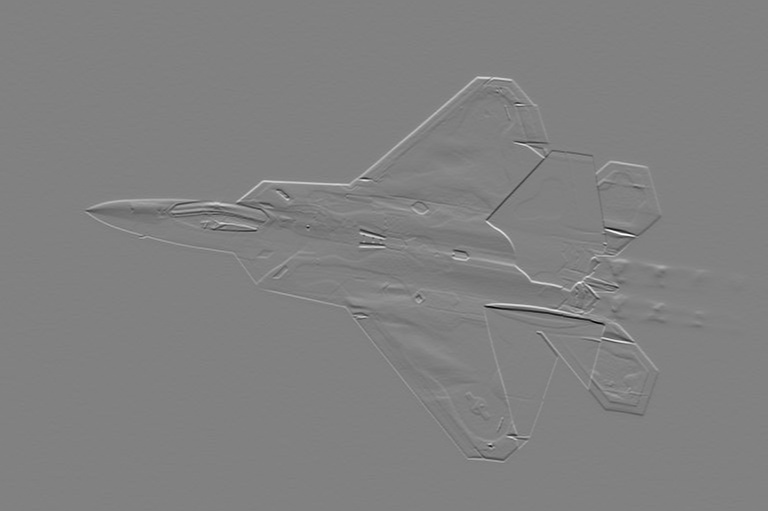

In [4]:
# Carregar a imagem
image = cv2.imread('f22.jpg')

# Converter para escala de cinza
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Aplicar filtro de Sobel na direção vertical
sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)

# Normalizar o resultado entre 0 e 255
normalized_sobel = cv2.normalize(sobel_y, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

# Exibir a imagem resultante
cv2_imshow(normalized_sobel)

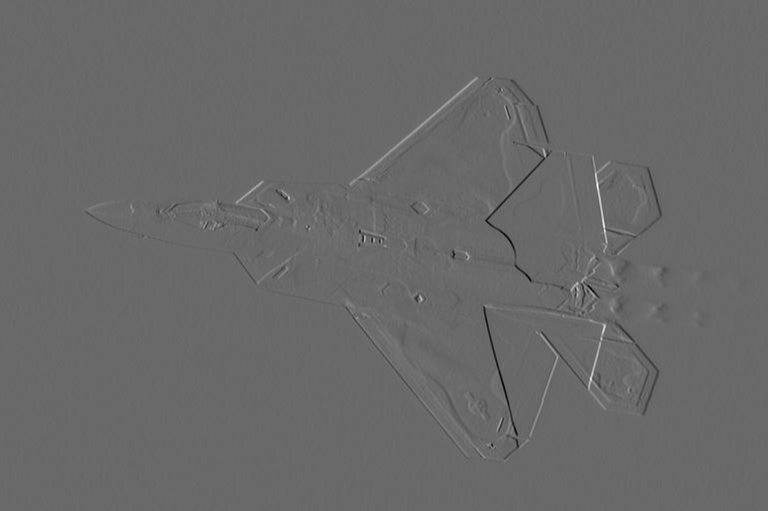

In [5]:
sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)

# Normalizar o resultado entre 0 e 255
normalized_sobel = cv2.normalize(sobel_x, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

# Exibir a imagem resultante
cv2_imshow(normalized_sobel)

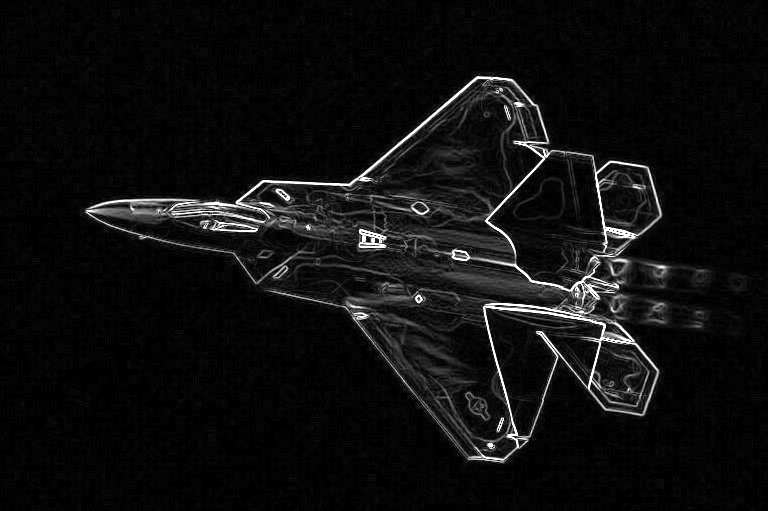

In [6]:
gradient_magnitude = cv2.magnitude(sobel_x, sobel_y)

# Exibir a imagem resultante
cv2_imshow(gradient_magnitude)

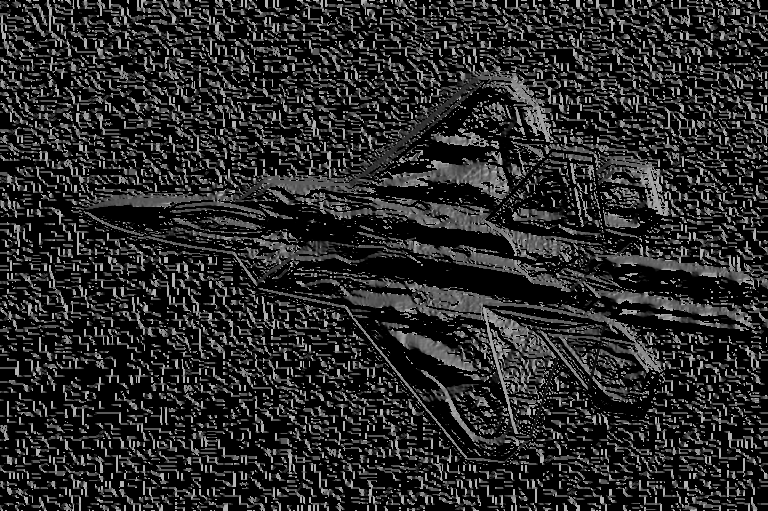

In [8]:
gradient_direction = np.arctan2(sobel_y, sobel_x)
gradient_direction_degrees = np.degrees(gradient_direction)
# Exibir a imagem resultante
cv2_imshow(gradient_direction_degrees)

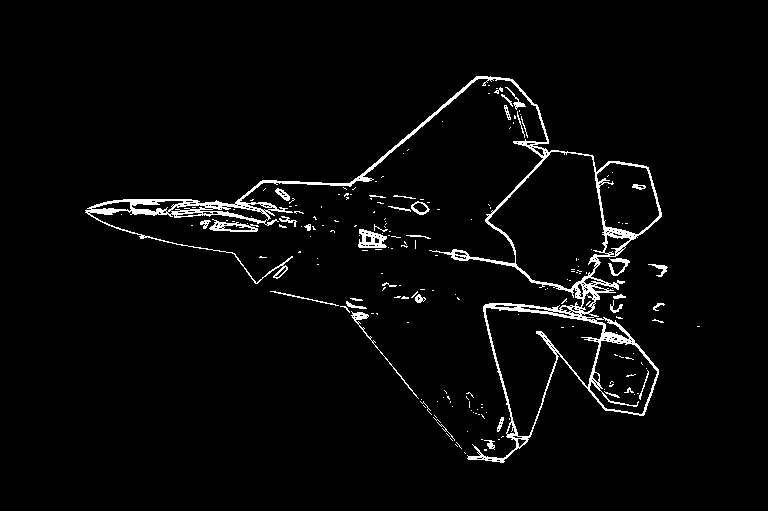

In [9]:
gradient_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
threshold_value = 100
_, thresholded_image = cv2.threshold(gradient_magnitude, threshold_value, 255, cv2.THRESH_BINARY)
cv2_imshow(thresholded_image)

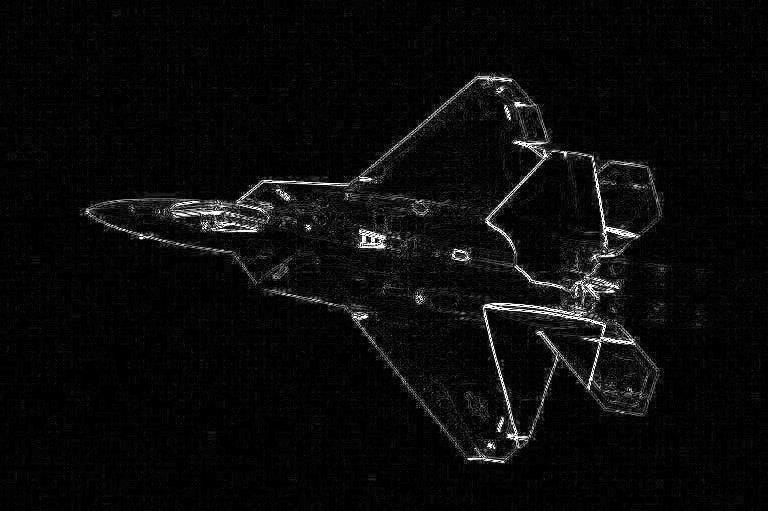

In [19]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
laplacian = cv2.Laplacian(gray, cv2.CV_64F, ksize = 3)

# Converter para imagem em escala de cinza
laplacian = cv2.convertScaleAbs(laplacian)

# Exibir a imagem filtrada
cv2_imshow( laplacian)

O operador Laplaciano é aplicado à imagem utilizando a função `cv2.Laplacian()`. O parâmetro `cv2.CV_64F` indica que o resultado deve ser retornado em ponto flutuante de 64 bits. Em seguida, utilizamos a função `cv2.convertScaleAbs()` para converter o resultado para uma imagem em escala de cinza de 8 bits. A imagem resultante laplacian exibirá as bordas detectadas pela aplicação do operador Laplaciano na imagem original.


Na filtragem do Laplaciano, os valores positivos e negativos surgem devido à natureza das derivadas de segunda ordem usadas no cálculo do operador Laplaciano. O operador Laplaciano é usado para detectar mudanças rápidas de intensidade em uma imagem, que geralmente indicam a presença de bordas. Ele é calculado aplicando um filtro que combina as derivadas de segunda ordem em direções x e y. Essas derivadas de segunda ordem capturam informações sobre a curvatura das transições de intensidade na imagem. Em regiões de transições de intensidade, onde há uma mudança abrupta, o Laplaciano pode produzir valores positivos e negativos. Os valores positivos indicam uma transição de intensidade clara-para-escura, enquanto os valores negativos indicam uma transição de intensidade escura-para-clara. Essa diferenciação entre valores positivos e negativos é útil para distinguir diferentes tipos de bordas na imagem.